# Hypothesentests

### DaLI &ndash; Basismodul
#### Prof. Dr. Konrad Förstner, Prof. Dr. Richard Hirsch, 21. Dezember 2021

In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
th_red        = '#c81e0f'
th_orange     = '#ea5a00'
th_magenta    = '#b43092'
th_grey       = 'gray'
th_darkgrey   = 'darkgray'

## Daten Bereitstellen I

In der Veranstaltung vom 16. November 2021 haben Sie die folgenden Forschungsfragen und Hypothesen aufgestellt:

### Forschungsfrage
Für den Raum Köln, welche Faktoren haben Einfluss auf die lokale Feinstaubbelastung der Luft?

### Hypothesen (Forschungsfragen)

1. Es gibt einen Zusammenhang zwischen Jahreszeit und Luftqualität. 
2. Es gibt einen Unterschied zwischen der Luftqualität an Tagen unter der Woche und am Wochenende.
3. Gibt es einen Unterschied in der Luftqualität in Abhängigkeit vom Messstandort?
1. Die Extremwetterereignisse mit hohem Niederschlag nehmen zu.
1. Es gibt einen Unterschied zwischen der Feinstaubbelastung der Luft am Tag und in der Nacht.
2. Es gibt einen Zusammenhang zwischen Wetter, also Luftdruck, Temperatur oder Niederschlag mit der Feinstaubbelastung.


## Hypothesentests

### Vorgehen bei einem Hypothesentest
(nach Chow und Liu, 2008)

1. Formuliere die **Nullhypothese**
2. Formuliere eine **Alternativhypothese**, die für die Forscher besonders interessant ist,
2. wähle eine **Teststatistik** und **Signifikanzniveau**,
3. bestimme die **Nullverteilung** der Teststatistik,
4. bestimme den **Annahme-** und **Ablehnungsbereich** für die Nullhypothese,
5. generiere eine Stichprobe (Studie bzw. Experiment durchführen),
6. berechne die Teststatistik,
7. ermittle das Ergebnis der Studie gemäß den Vorgaben aus Nr. 3 und 5.

## Nullhypothese

Es gibt **keinen** Unterschied zwischen der Feinstaubbelastung der Luft am Tag und in der Nacht.

## Alternativhypothese

### einseitig

Die Feinstaubbelastung der Luft ist am Tag **höher** als in der Nacht.

### zweiseitig

Die Feinstaubbelastung der Luft ist am Tag **höher oder geringer** als in der Nacht.

## Teststatistik

Anzahl der Tage im Beobachtungszeitraum, an denen die Feinstaubbelastung am Tag höher ist als in der Nacht.

### Signifikanzniveau

Auch unter der Nullhypothese ist es &ndash; zumindest theoretisch &ndash; möglich, dass alle &ndash; oder fast alle &ndash; Beobachtungen positiv ausfallen. 

Man muss nun &ndash; vor dem Experiment &ndash; eine Wahrscheinlichkeit festlegen, bei der man nicht mehr bereit ist, das Ergebnis durch bloßen Zufall zu erklären; das ist das *Signifikanzniveau*.

Nach allgemeiner Übereinkunft gilt ein Signifikanzniveau von 5&#x2009;% als guter Kompromiss zwischen &mdash; ja, und das klären wir später.

In [3]:
α = 0.05

## Nullverteilung

Unter der Nullhypothese (kein Effekt) beruhen die Ergebnisse **Verbesserung** bzw. **keine Verbesserung** nur auf Zufall.

Stellen wir uns vor, wir hätten $n$ Beobachtungen gemacht. Wieveile **Verbesserungen** erwarten wir (immer noch unter der Nullhypothese)?

Ungefähr die Hälfte, aber geht das genauer?

Die Antwort liefert uns die &hellip;

### Binomialverteilung

> Die [**Binomialverteilung**](https://de.wikipedia.org/wiki/Stochastisch_unabh%C3%A4ngige_Ereignisse) [&hellip;] 
> beschreibt die Anzahl der Erfolge in einer Serie von gleichartigen und 
> [unabhängigen](https://de.wikipedia.org/wiki/Stochastisch_unabh%C3%A4ngige_Ereignisse) Versuchen, die jeweils 
> genau zwei mögliche Ergebnisse haben [&hellip;].

Seite „Binomialverteilung“. In: Wikipedia – Die freie Enzyklopädie. Bearbeitungsstand: 4. November 2021, 17:11 UTC. URL: https://de.wikipedia.org/w/index.php?title=Binomialverteilung&oldid=216974685 (Abgerufen: 19. Dezember 2021, 16:01 UTC) 

In [4]:
from scipy.stats import binom

In [5]:
p = 0.5                # probability for positive outcome
n = 12                 # number of observations
k = np.arange(n + 1)   # number of positive observations
                       # k in {0, 1, ..., n}

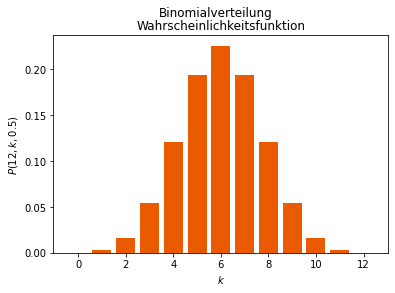

In [6]:
fig_pmf, ax_pmf = plt.subplots()
fig_pmf.suptitle('Binomialverteilung')

ax_pmf.set_title('Wahrscheinlichkeitsfunktion')
ax_pmf.set_xlabel('$k$')
ax_pmf.set_ylabel(f'$P({n}, k, {p})$')
ax_pmf.bar(k, binom.pmf(k, n, p), color=th_orange) # probability mass function
None

#### statistische Parameter

(vergl. Daten auswerten I)

In [7]:
mean, var, skew, kurt = binom.stats(n, 1/2, moments='mvsk')

print(f"Binomialverteilung, n={n}")
print(" "*19, "p= \xBD")
print("-"*25)
print(f"Mittelwert:        {mean:5.1f}")
print(f"Varianz:           {var:5.1f}")
print(f"Schiefe:           {skew:5.1f}")
print(f"Wölbung:           {kurt:5.1f}")

Binomialverteilung, n=12
                    p= ½
-------------------------
Mittelwert:          6.0
Varianz:             3.0
Schiefe:             0.0
Wölbung:            -0.2


#### kumulative Verteilungsfunktion

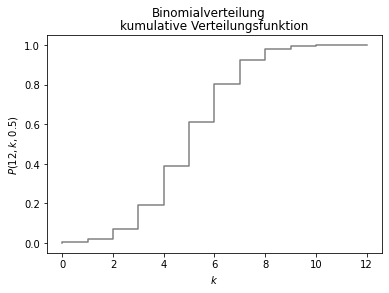

In [8]:
fig_cmf, ax_cmf = plt.subplots()
fig_cmf.suptitle('Binomialverteilung')

ax_cmf.set_title('kumulative Verteilungsfunktion')
ax_cmf.set_xlabel('$k$')
ax_cmf.set_ylabel(f'$P({n}, k, {p})$')
ax_cmf.step(k, binom.cdf(k, n, p), color=th_grey)  # cumulative density function
None

#### Quantile

Für welches $k$ nimmt die kumulative Verteilungsfunktion einen bestimmten Wert an?

In [9]:
binom.ppf(0.5, n, p)  # percent point function

6.0

(Ach ja, die 50&#x2009;%-Quantile ist ja der Median!)

In [10]:
q_95 = binom.ppf(0.95, n, p)           # 95 % quantile
print(f'95%-Quantile: {q_95:9.0f}')
print(f'erfasster Bereich: {100*binom.cdf(q_95, n, p):6.1f} %')

95%-Quantile:         9
erfasster Bereich:   98.1 %


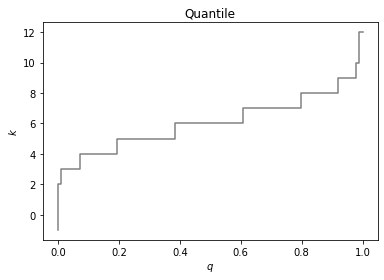

In [11]:
fig_ppf, ax_ppf = plt.subplots()

q = np.linspace(0, 1, 100)

ax_ppf.set_title('Quantile')
ax_ppf.set_xlabel('$q$')
ax_ppf.set_ylabel('$k$')
ax_ppf.step(q, binom.ppf(q, n, p), color=th_grey)  # percent point function
None

## Annahme und Ablehnungsbereich

### einseitige Fragestellung

In [12]:
k_1 = binom.ppf(1 - α, n, p)
print(f"Grenze zwischen Annahme- und Ablehnungsbereich (einseitig): {k_1}")

Grenze zwischen Annahme- und Ablehnungsbereich (einseitig): 9.0


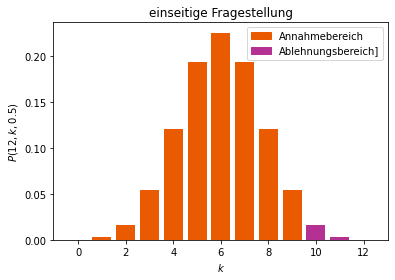

In [13]:
fig_rr1, ax_rr1 = plt.subplots()        # region of rejection

rr_labels  = [ 'Annahmebereich', 'Ablehnungsbereich]' ]
rr_handles = [ plt.Rectangle((0, 0), 1, 1, color=color) for color in [th_orange, th_magenta] ]

ax_rr1.set_title('einseitige Fragestellung')
ax_rr1.set_xlabel('$k$')
ax_rr1.set_ylabel(f'$P({n}, k, {p})$')
ax_rr1.bar(k, binom.pmf(k, n, p),
          color=[th_magenta if l > k_1 else th_orange for l in k])
ax_rr1.legend(rr_handles, rr_labels)
None

Ein Anteil von $\alpha$ der Beobachtungen fällt bei Gültigkeit der Nullhypothese in den Ablehnungsbereich.

### zweiseitige Fragestellung

In [14]:
k_2 = (binom.ppf(α/2, n, p), binom.ppf(1 - α/2, n, p))
print(f"Grenzen zwischen Annahme- und Ablehnungsbereich (zweiseitig): {k_2}")

Grenzen zwischen Annahme- und Ablehnungsbereich (zweiseitig): (3.0, 9.0)


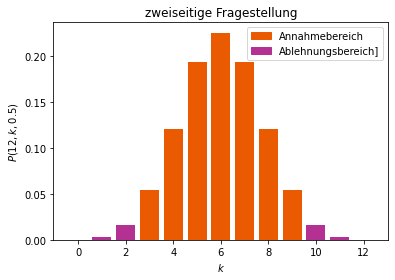

In [15]:
fig_rr2, ax_rr2 = plt.subplots()        # region of rejection

ax_rr2.set_title('zweiseitige Fragestellung')
ax_rr2.set_xlabel('$k$')
ax_rr2.set_ylabel(f'$P({n}, k, {p})$')
ax_rr2.bar(k, binom.pmf(k, n, p), label='Annahmebereich',
          color=[th_magenta if l < k_2[0] or l > k_2[1] else th_orange for l in k])
ax_rr2.legend(rr_handles, rr_labels)
None

Ein Anteil von $\alpha$ der Beobachtungen fällt bei Gültigkeit der Nullhypothese in den Ablehnungsbereich.

## Ergebnis

### Prüfgröße im Ablehnungsbereich

1. Die **Nullhypothese trifft nicht zu** &ndash; es gibt einen echten Effekt. Der Test liefert ein **korrektes Ergebnis**.
2. Die **Nullhypothese trifft zu**! Die Prüfgröße ist durch Zufall im Ablehnungsbereich gelandet. Wir machen einen **Fehler 1.&nbsp;Art**.

Da wir die Größe des Fehlers 1.&nbsp;Art selbst und so festlegen können, dass wir mit dem falschen Ergebnis leben könnten, ist das in Ordnung.

Liegt die Nullhypothese im Ablehnungsbereich lehnen wir sie auf dem gewählten Signifikanzniveau ab. (Und gehen davon aus, dass es einen Effekt gibt.)

### Prüfgröße im Annahmebereich

1. Die **Nullhypothese trifft zu** &ndash; es gibt keinen echten Effekt. Der Test liefert ein **korrektes Ergebnis**.
2. Die **Nullhypothese trifft nicht zu**! Die Prüfgröße ist durch Zufall &ndash; trotz Effekt &ndash; im Annahmebereich gelandet. Wir machen einen **Fehler 2.&nbsp;Art**.

Da wir die Größe des Fehlers 2.&nbsp;Art nicht kennen, können wir keine Risikobewertung machen.

Liegt die Nullhypothese im Annahmebereich, können wir die Nullhypothese nicht ablehnen. Wir können sie aber auch nicht annehmen: Vielleicht gibt es ja tatsächlich einen Effekt, aber unser Experiment war nicht mächtig genug, ihn nachzuweisen.

Wir sind so klug als wie zuvor!

## Auswertung

Das Auslesen der Daten für die Feinstaubbelastungen um 3:00 Uhr (Nacht) und 15:00 Uhr (Tag) ergab folgendes Ergebnis (https://github.com/konrad/DaLI_Basismodul_WiSe2021_2022/blob/main/Feinstaub_Tag_vs_Nacht.ipynb)

```
     False    212
     True     151
```

Damit die Nullhypothese abgelehnt werden kann, muss der Wert der kumulativen Verteilungsfunktion (CDF) für die Ereignisse, die die Hypothese stützen (`True`), größer als $1 - \alpha$ werden (einseitige Fragestellung). 

Das Ergebnis ist &hellip;

In [16]:
binom.cdf(151, 151 + 212, 1/2)

0.0008005845014284349

Der Wert ist also viel kleiner! Die Nullhypothese kann also nicht abgelehnt werden.

(Wenn wir die Alternativhypothese umgekehrt formuliert hätten &ndash; also &bdquo;Die Feinstaubbelastung ist nachts größer als am Tag&ldquo; &ndash; hätten wir die Nullhypothese ablehnen können! Man darf Nullhypothese, Alternativhypothese und Signifikanzniveau aber nach der Datenerhebung nicht mehr ändern. Wir müssen eine neue Auswertung planen, die auf den neuen Erkenntnissen basiert.)

## p-Wert

Viele Statistikprogramme geben als Ergebnis einen **p-Wert** aus.

Das ist der Inhalt der Fläche unter der Wahrscheinlichkeitsfunktion rechts vom Ergebnis der Prüfgröße. 

In [18]:
p_value = 1 - binom.cdf(151, 151 + 212, 1/2)
print(f"p-Wert:  {p_value:8.4}")

p-Wert:    0.9992


Wenn der $p$-Wert kleiner als das Signifikanzniveau&nbsp;$\alpha$ ist, gilt das Ergebnis als statistisch signifikant.

Man verwendet den $p$-Wert auch dazu, verschiedene Ausprägungen von 
[Signifikanz](https://xkcd.com/882/) zu definieren:

| $p$-Wert | Signifikanz | Sternchennotation |
| :--------: | :-----------: | :-----------------: |
| 0,1 &ndash; 1 | keine Signifikanz | (*kein Symbol*) |
| 0,05 &ndash; 0,1 | schwach signifikant | + |
| 0,01 &ndash; 0,05 | signifikant | * |
| 0,001 &ndash; 0,01 | sehr signifikant | ** |
| 0 &ndash; 0,001 | hoch signifikant | *** |

**Achtung** Der $p$-Wert selbst ist uns niemals bekannt, sondern nur ein (grober) Schätzwert. Bei der Interpretation des $p$-Werts ist also [Vorsicht](https://xkcd.com/1478) geboten.

### *Jelly beans cause acne!*

https://xkcd.com/882/